In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division

import pymc as pm

In [130]:
N = 100

p = pm.Beta('p_cheat', 1, 1)

true_answers = pm.Bernoulli('true_answers', p=p, size=N)

@pm.deterministic
def n_true(true_answers=true_answers):
    return true_answers.sum()

first_coin = pm.Bernoulli('first_coin', p=0.5, size=N)
second_coin = pm.Bernoulli('second_coin', p=0.5, size=N)

@pm.deterministic
def observed_proportion(t_a=true_answers, f_c=first_coin, s_c=second_coin):
    observed = t_a * f_c + (1 - f_c) * s_c
    return observed.sum() / N

n_answer_yes = pm.Binomial('n_answer_yes', n=N, p=observed_proportion, observed=True, value=35)

In [131]:
model = pm.Model([p, first_coin, n_true, observed_proportion, n_answer_yes])

In [132]:
mcmc = pm.MCMC(model)

In [133]:
mcmc.sample(10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 2.3 sec

In [134]:
mcmc.trace('n_true')[:10]

array([67, 67, 66, 66, 66, 66, 66, 62, 63, 63])

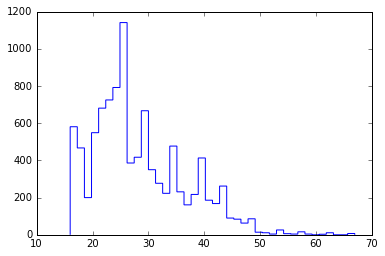

In [137]:
hist(mcmc.trace('n_true')[:], bins=40, histtype='step');

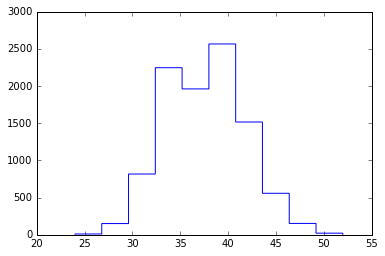

In [138]:
hist(mcmc.trace('observed_proportion')[:]*100, histtype='step');

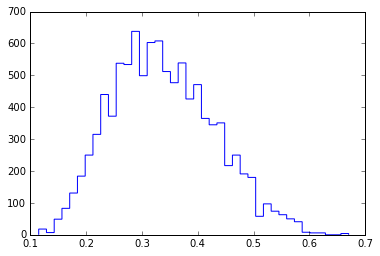

In [128]:
hist(mcmc.trace('p_cheat')[:], 40, histtype='step');

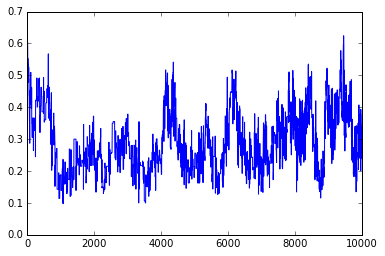

In [139]:
plot(mcmc.trace('p_cheat')[:]);